In [403]:
# Importar librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [404]:
# Graficar las salidas

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [405]:
# Cargar datos
data = pd.read_csv("citas_nuevo.csv", header=None)

[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
[0 0 0 ... 0 0 0]


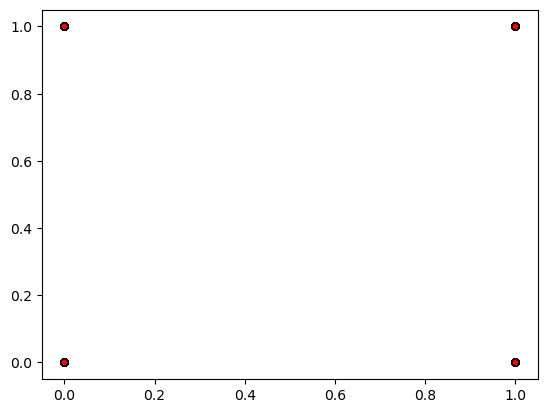

In [406]:
# Obtengo x e y
data = data.dropna()

X = np.array(data[[7,8,9, 10, 11, 12]])  # defino x1, x2 /// Age / Fare
y = np.array(data[13])  # defino y / Survived
print(X)
print(y)

# Mostramos el grafico
plot_points(X,y)
plt.show()

In [407]:
# Implementar las ecuaciones de Gradiente Descendiente

# Funcion sigmoidal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    # Calcular la combinación lineal de características y pesos más el sesgo
    output = np.dot(features, weights) + bias
    # Aplicar la función sigmoide para obtener valores en el rango (0, 1)
    return 1 / (1 + np.exp(-output))

def error_formula(y, output):
    # Asegurar que los valores estén en el rango válido para el logaritmo
    output = np.clip(output, 1e-15, 1 - 1e-15)
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Actualizar pesos
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias


In [408]:
# Entrenamiento

np.random.seed(17) #44
 
epochs = 300 #1000 - 1450
learnrate = 0.0001 #0.1 - 0.001

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = [] # alamacenar el error
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(np.array(x), weights, bias)
            error = error_formula(y, output)  # y vs y_sombrero
            weights, bias = update_weights(x, y, weights, bias, learnrate)
                   
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            print("---------------")
            print(e)
            print("---------------")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss)
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
---------------
0
---------------
Train loss:  0.5009325985519862
Accuracy:  0.7980131551566586

========== Epoch 30 ==========
---------------
30
---------------
Train loss:  0.49449127296624384
Accuracy:  0.798067440534892

========== Epoch 60 ==========
---------------
60
---------------
Train loss:  0.4944549556600466
Accuracy:  0.798067440534892

========== Epoch 90 ==========
---------------
90
---------------
Train loss:  0.4944524629384364
Accuracy:  0.798067440534892

========== Epoch 120 ==========
---------------
120
---------------
Train loss:  0.49445219118448996
Accuracy:  0.798067440534892

========== Epoch 150 ==========
---------------
150
---------------
Train loss:  0.49445214778163427
Accuracy:  0.798067440534892

========== Epoch 180 ==========
---------------
180
---------------
Train loss:  0.4944521389830431
Accuracy:  0.798067440534892

========== Epoch 210 ==========
---------------
210
---------------
Train loss:  0.494452136992

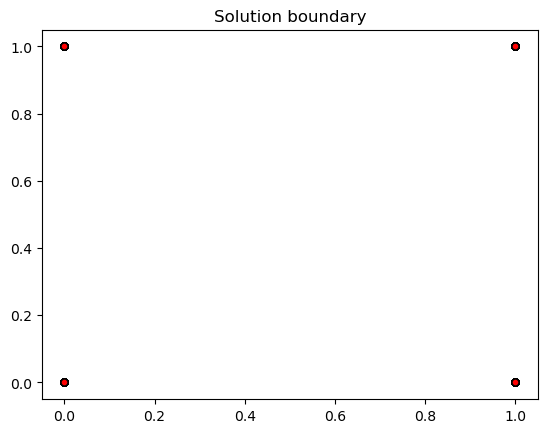

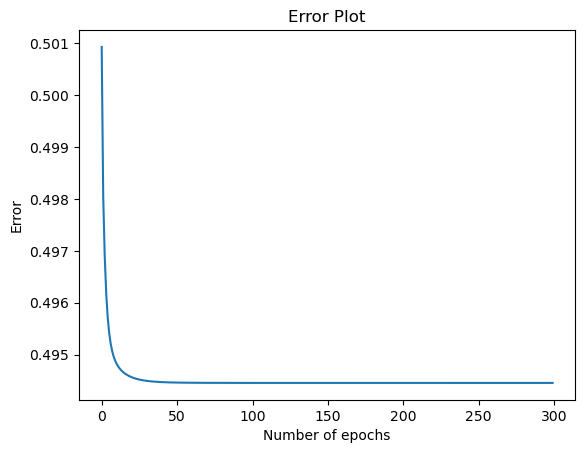

In [409]:
train(X, y, epochs, learnrate, True)